<a href="https://colab.research.google.com/github/nikhilmuser/nikhilmuser/blob/main/corrected_of_food_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multiclass Classification using Keras and TensorFlow on Food-101 Dataset  
![alt text](https://www.vision.ee.ethz.ch/datasets_extra/food-101/static/img/food-101.jpg)

**Food-101 Dataset** - https://www.vision.ee.ethz.ch/datasets_extra/food-101/

_Notebook orignially contributed by: [Avinash Kappa](https://theimgclist.github.io/)_

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/examples/blob/master/community/en/multi_class_classification/food_classifier.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/examples/blob/master/community/en/multi_class_classification/food_classifier.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
</table>

# Install TensorFlow 2.0 Preview

* TensorFlow 2.0 preview is available to test
* Colab is the easiest way to try it
* We can install TensorFlow 2.0 Preview using the below code cell

In [1]:
# Uncomment the below line of code if you want to try TensorFlow v2.0
#!pip install tf-nightly-gpu-2.0-preview

* Upgrading to TF 2.0 will be a critical process if you already have projects/code in other TF versions
* tf_upgrade_v2 tool helps in converting existing TF code to TF 2.0
* This tool is automatically installed by pip install for TensorFlow 1.13 and later
* Below is an example of how to use this tool:

`tf_upgrade_v2 --infile script.py --outfile script-upgraded.py`

# Download and extract Food 101 Dataset

* Add all the imports

In [2]:
from __future__ import absolute_import, division, print_function

import tensorflow as tf

import keras.backend as K
from keras.models import load_model
from keras.preprocessing import image
from keras import regularizers
from keras.applications.inception_v3 import InceptionV3
from keras.models import Model
from keras.layers import Dense, Dropout
from keras.layers import GlobalAveragePooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, CSVLogger
from keras.optimizers import SGD
from keras.regularizers import l2

from tensorflow import keras
from keras import models
from keras.applications.inception_v3 import preprocess_input

import cv2
import os
import random
import collections
from collections import defaultdict

from shutil import copy
from shutil import copytree, rmtree

import numpy as np

import matplotlib.pyplot as plt
import matplotlib.image as img


In [3]:
# Check TF version and whether GPU is enabled
print(tf.__version__)
print(tf.test.gpu_device_name())

2.13.0
/device:GPU:0


In [4]:
# Clone tensorflow/examples repo which has images to evaluate trained model
!git clone https://github.com/tensorflow/examples.git

Cloning into 'examples'...
remote: Enumerating objects: 23643, done.
remote: Counting objects: 100% (607/607), done.
remote: Compressing objects: 100% (372/372), done.
remote: Total 23643 (delta 186), reused 544 (delta 155), pack-reused 23036
Receiving objects: 100% (23643/23643), 44.10 MiB | 27.39 MiB/s, done.
Resolving deltas: 100% (12835/12835), done.


In [5]:
# Helper function to download data and extract

def get_data_extract():
  if "food-101" in os.listdir():
    print("Dataset already exists")
  else:
    tf.keras.utils.get_file(
    'food-101.tar.gz',
    'http://data.vision.ee.ethz.ch/cvl/food-101.tar.gz',
    cache_subdir='/content',
    extract=True,
    archive_format='tar',
    cache_dir=None
    )
    print("Dataset downloaded and extracted!")

* The Food-101 dataset is 5GB in size. This might take some time to finish..

In [6]:
# Download data and extract it to folder
get_data_extract()

4996278331/4996278331 [==============================] - 277s 0us/step
Dataset downloaded and extracted!


# Understand dataset structure and files

* The dataset being used is [Food 101](https://www.vision.ee.ethz.ch/datasets_extra/food-101/)
* This dataset has 101000 images in total. It's a food dataset with 101 categories(multiclass)
* Each type of food has 750 training samples and 250 test samples
* Note found on the webpage of the dataset :  
* On purpose, the training images were not cleaned, and thus still contain some amount of noise. This comes mostly in the form of intense colors and sometimes wrong labels. All images were rescaled to have a maximum side length of 512 pixels.
* The entire dataset is 5GB in size

In [7]:
# Check the extracted dataset folder
os.listdir('food-101')

['license_agreement.txt', 'meta', 'README.txt', 'images']

**images** folder contains 101 folders with 1000 images  each  
Each folder contains images of a specific food class

In [8]:
os.listdir('food-101/images')

['french_toast',
 'frozen_yogurt',
 'baklava',
 'donuts',
 'french_onion_soup',
 'bruschetta',
 'ramen',
 'cheesecake',
 'hot_dog',
 'prime_rib',
 'garlic_bread',
 'breakfast_burrito',
 'pulled_pork_sandwich',
 'hot_and_sour_soup',
 'greek_salad',
 'pad_thai',
 'onion_rings',
 'ice_cream',
 'miso_soup',
 'pho',
 'omelette',
 'churros',
 'pizza',
 'scallops',
 'fish_and_chips',
 'beignets',
 'shrimp_and_grits',
 'chicken_wings',
 'cup_cakes',
 'cheese_plate',
 'falafel',
 'caprese_salad',
 'spaghetti_carbonara',
 'spaghetti_bolognese',
 'deviled_eggs',
 'grilled_salmon',
 'hummus',
 'fried_calamari',
 'lasagna',
 'gyoza',
 'dumplings',
 'ravioli',
 'cannoli',
 'risotto',
 'guacamole',
 'panna_cotta',
 'poutine',
 'macarons',
 'caesar_salad',
 'apple_pie',
 'chicken_quesadilla',
 'bibimbap',
 'carrot_cake',
 'crab_cakes',
 'peking_duck',
 'edamame',
 'bread_pudding',
 'beet_salad',
 'fried_rice',
 'red_velvet_cake',
 'clam_chowder',
 'french_fries',
 'waffles',
 'steak',
 'pancakes',
 't

**meta** folder contains the text files - train.txt and test.txt  
**train.txt** contains the list of images that belong to training set  
**test.txt** contains the list of images that belong to test set  
**classes.txt** contains the list of all classes of food

In [9]:
os.listdir('food-101/meta')

['labels.txt',
 'train.json',
 'test.json',
 'train.txt',
 'classes.txt',
 'test.txt']

# Visualize random image from each of the 101 classes

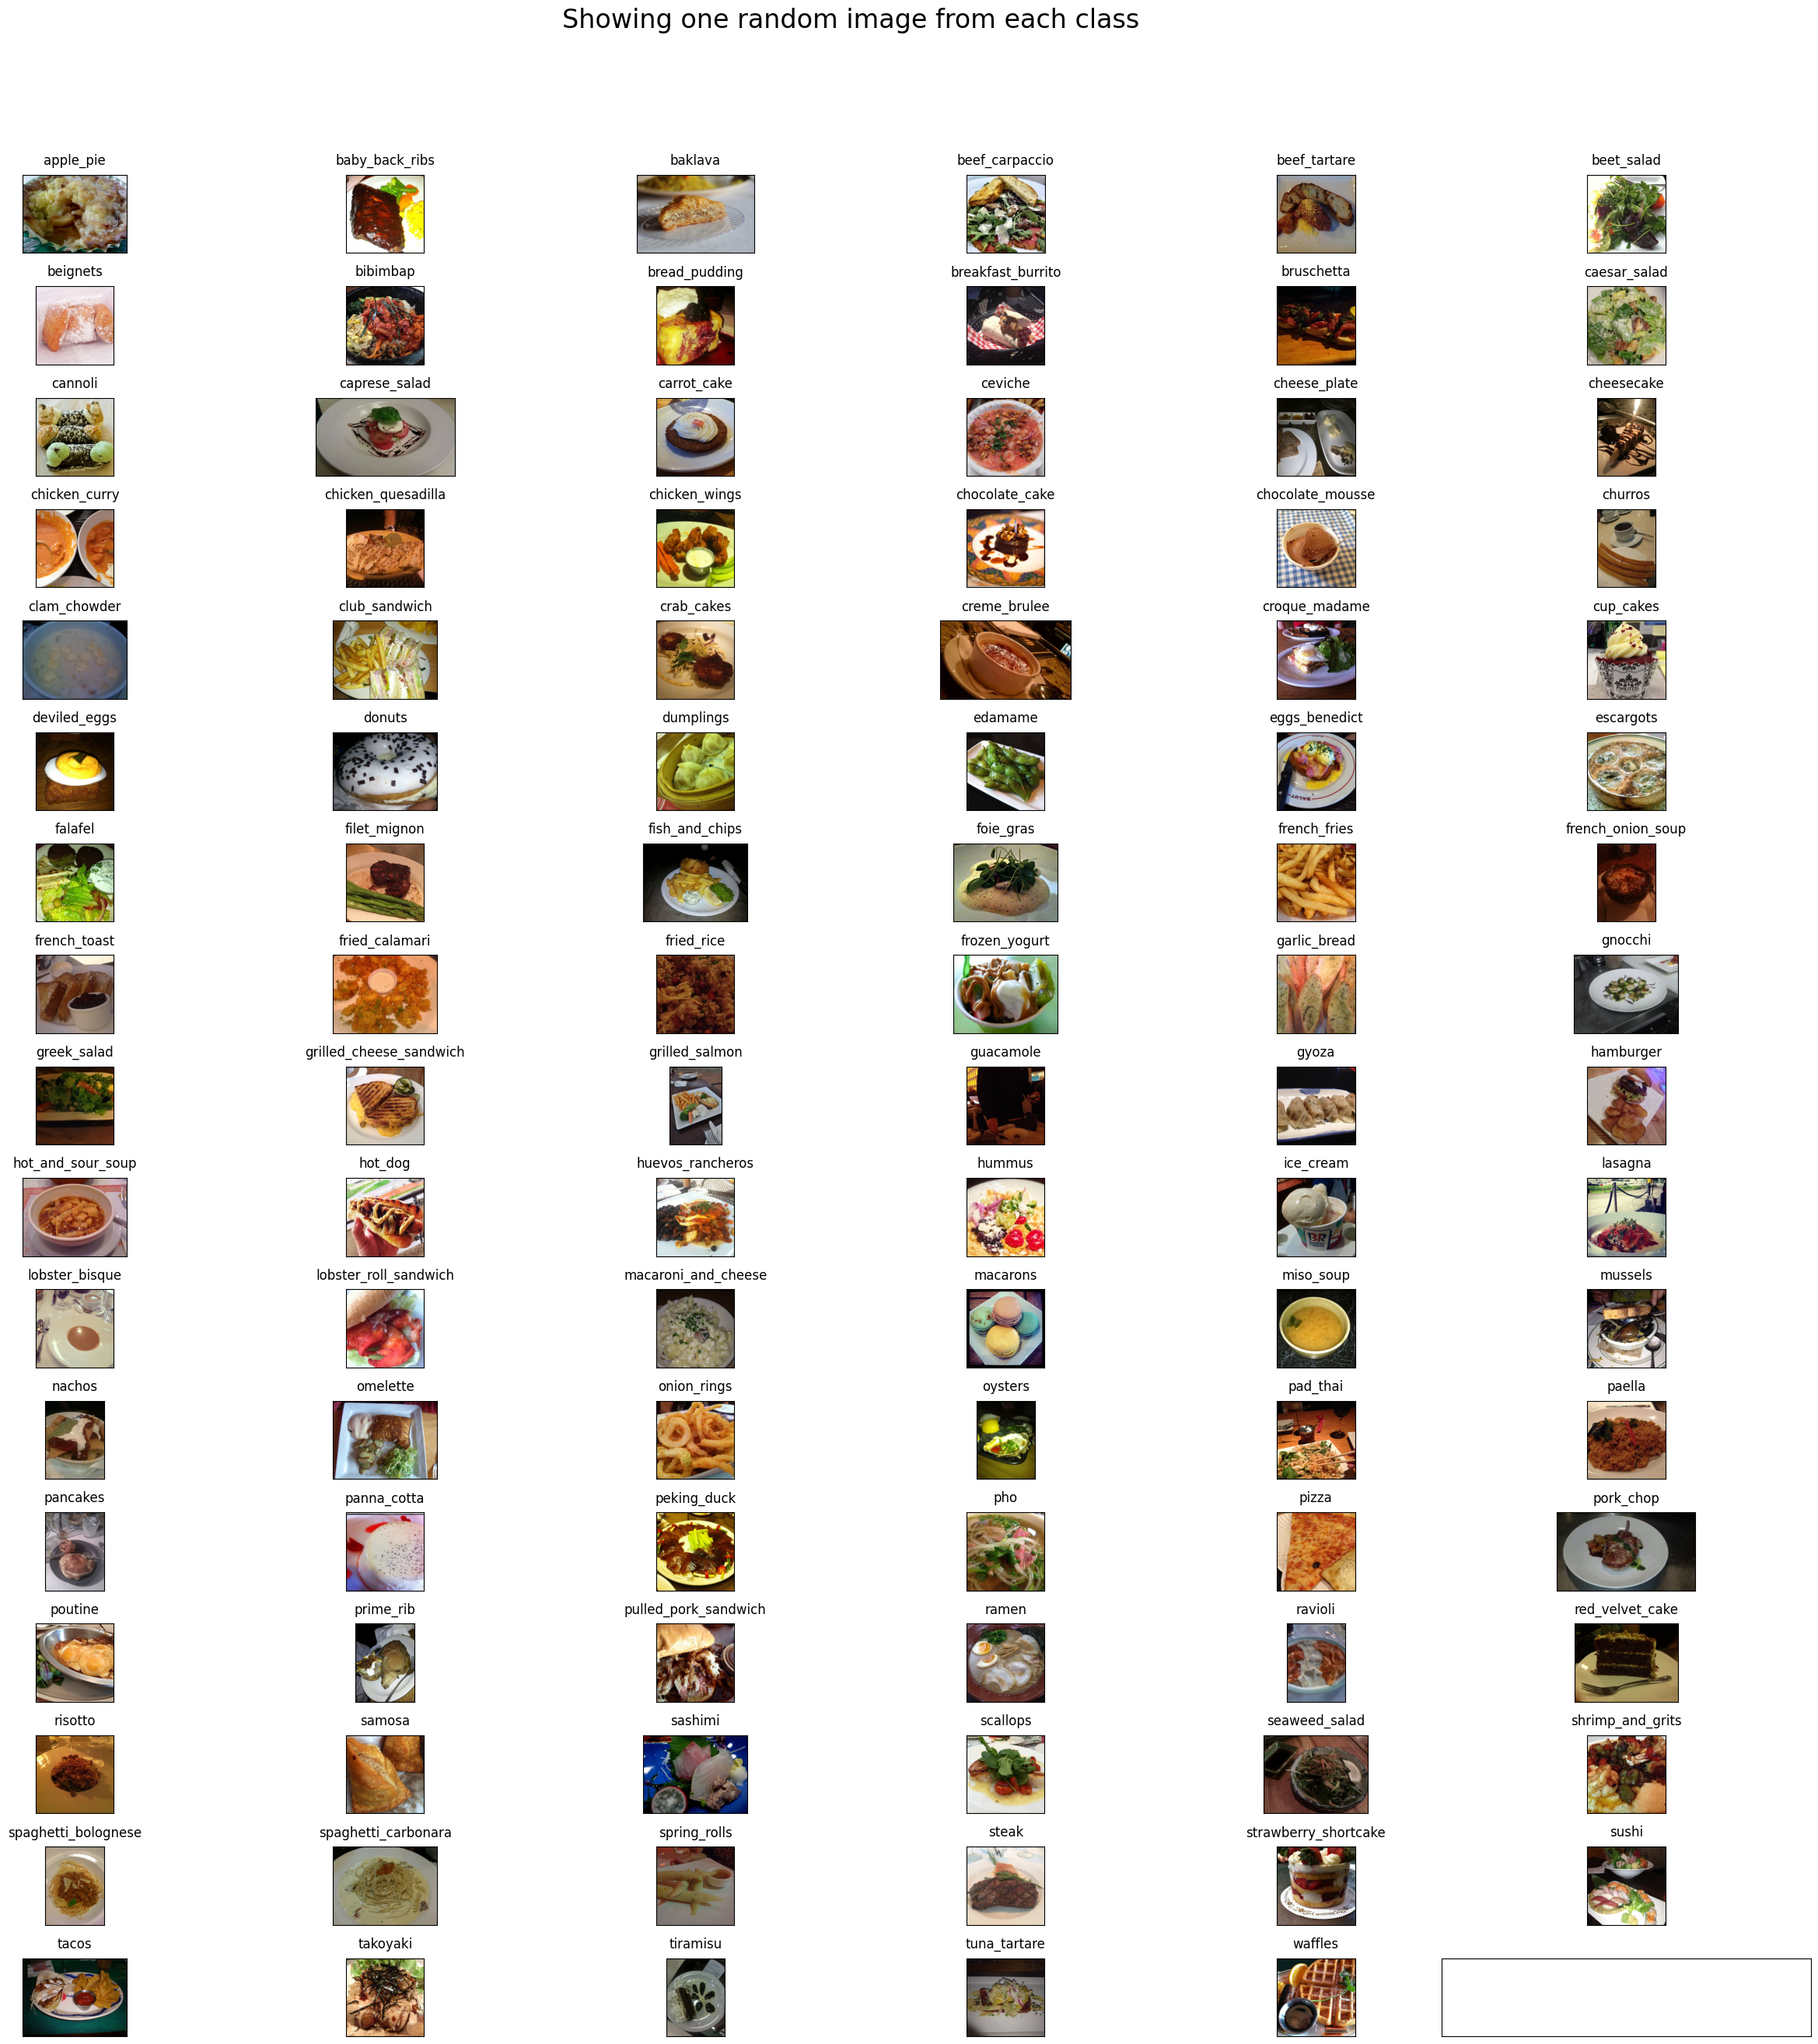

In [10]:
# Visualize the data, showing one image per class from 101 classes
rows = 17
cols = 6
fig, ax = plt.subplots(rows, cols, figsize=(25,25))
fig.suptitle("Showing one random image from each class", y=1.05, fontsize=24) # Adding  y=1.05, fontsize=24 helped me fix the suptitle overlapping with axes issue
data_dir = "food-101/images/"
foods_sorted = sorted(os.listdir(data_dir))
food_id = 0
for i in range(rows):
  for j in range(cols):
    try:
      food_selected = foods_sorted[food_id]
      food_id += 1
    except:
      break
    food_selected_images = os.listdir(os.path.join(data_dir,food_selected)) # returns the list of all files present in each food category
    food_selected_random = np.random.choice(food_selected_images) # picks one food item from the list as choice, takes a list and returns one random item
    img = plt.imread(os.path.join(data_dir,food_selected, food_selected_random))
    ax[i][j].imshow(img)
    ax[i][j].set_title(food_selected, pad = 10)

plt.setp(ax, xticks=[],yticks=[])
plt.tight_layout()
# https://matplotlib.org/users/tight_layout_guide.html


# Split the image data into train and test using train.txt and test.txt

In [11]:
# Helper method to split dataset into train and test folders
def prepare_data(filepath, src,dest):
  classes_images = defaultdict(list)
  with open(filepath, 'r') as txt:
      paths = [read.strip() for read in txt.readlines()]
      for p in paths:
        food = p.split('/')
        classes_images[food[0]].append(food[1] + '.jpg')

  for food in classes_images.keys():
    print("\nCopying images into ",food)
    if not os.path.exists(os.path.join(dest,food)):
      os.makedirs(os.path.join(dest,food))
    for i in classes_images[food]:
      copy(os.path.join(src,food,i), os.path.join(dest,food,i))
  print("Copying Done!")

In [12]:
# Prepare train dataset by copying images from food-101/images to food-101/train using the file train.txt
print("Creating train data...")
prepare_data('food-101/meta/train.txt', 'food-101/images', 'food-101/train')

Creating train data...

Copying images into  apple_pie

Copying images into  baby_back_ribs

Copying images into  baklava

Copying images into  beef_carpaccio

Copying images into  beef_tartare

Copying images into  beet_salad

Copying images into  beignets

Copying images into  bibimbap

Copying images into  bread_pudding

Copying images into  breakfast_burrito

Copying images into  bruschetta

Copying images into  caesar_salad

Copying images into  cannoli

Copying images into  caprese_salad

Copying images into  carrot_cake

Copying images into  ceviche

Copying images into  cheesecake

Copying images into  cheese_plate

Copying images into  chicken_curry

Copying images into  chicken_quesadilla

Copying images into  chicken_wings

Copying images into  chocolate_cake

Copying images into  chocolate_mousse

Copying images into  churros

Copying images into  clam_chowder

Copying images into  club_sandwich

Copying images into  crab_cakes

Copying images into  creme_brulee

Copying im

In [13]:
# Prepare test data by copying images from food-101/images to food-101/test using the file test.txt
print("Creating test data...")
prepare_data('food-101/meta/test.txt', 'food-101/images', 'food-101/test')

Creating test data...

Copying images into  apple_pie

Copying images into  baby_back_ribs

Copying images into  baklava

Copying images into  beef_carpaccio

Copying images into  beef_tartare

Copying images into  beet_salad

Copying images into  beignets

Copying images into  bibimbap

Copying images into  bread_pudding

Copying images into  breakfast_burrito

Copying images into  bruschetta

Copying images into  caesar_salad

Copying images into  cannoli

Copying images into  caprese_salad

Copying images into  carrot_cake

Copying images into  ceviche

Copying images into  cheesecake

Copying images into  cheese_plate

Copying images into  chicken_curry

Copying images into  chicken_quesadilla

Copying images into  chicken_wings

Copying images into  chocolate_cake

Copying images into  chocolate_mousse

Copying images into  churros

Copying images into  clam_chowder

Copying images into  club_sandwich

Copying images into  crab_cakes

Copying images into  creme_brulee

Copying ima

In [14]:
# Check how many files are in the train folder

train_files = sum([len(files) for i, j, files in os.walk("food-101/train")])
print("Total number of samples in train folder")
print(train_files)

Total number of samples in train folder
75750


In [15]:
# Check how many files are in the test folder
test_files = sum([len(files) for i, j, files in os.walk("food-101/test")])
print("Total number of samples in test folder")
print(test_files)

Total number of samples in test folder
25250


# Create a subset of data with few classes (3)

* We now have train and test data ready  
* But to experiment and try different architectures, working on the whole data with 101 classes takes a lot of time and computation  
* To proceed with further experiments, I am creating train_min and test_mini, limiting the dataset to 3 classes  
* Since the original problem is multiclass classification which makes key aspects of architectural decisions different from that of binary classification, choosing 3 classes is a good start instead of 2

In [16]:
# List of all 101 types of foods(sorted alphabetically)
foods_sorted

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito',
 'bruschetta',
 'caesar_salad',
 'cannoli',
 'caprese_salad',
 'carrot_cake',
 'ceviche',
 'cheese_plate',
 'cheesecake',
 'chicken_curry',
 'chicken_quesadilla',
 'chicken_wings',
 'chocolate_cake',
 'chocolate_mousse',
 'churros',
 'clam_chowder',
 'club_sandwich',
 'crab_cakes',
 'creme_brulee',
 'croque_madame',
 'cup_cakes',
 'deviled_eggs',
 'donuts',
 'dumplings',
 'edamame',
 'eggs_benedict',
 'escargots',
 'falafel',
 'filet_mignon',
 'fish_and_chips',
 'foie_gras',
 'french_fries',
 'french_onion_soup',
 'french_toast',
 'fried_calamari',
 'fried_rice',
 'frozen_yogurt',
 'garlic_bread',
 'gnocchi',
 'greek_salad',
 'grilled_cheese_sandwich',
 'grilled_salmon',
 'guacamole',
 'gyoza',
 'hamburger',
 'hot_and_sour_soup',
 'hot_dog',
 'huevos_rancheros',
 'hummus',
 'ice_cream',
 'lasagna',
 'lobster_bisque',
 'lobster

In [17]:
# Helper method to create train_mini and test_mini data samples
def dataset_mini(food_list, src, dest):
  if os.path.exists(dest):
    rmtree(dest) # removing dataset_mini(if it already exists) folders so that we will have only the classes that we want
  os.makedirs(dest)
  for food_item in food_list :
    print("Copying images into",food_item)
    copytree(os.path.join(src,food_item), os.path.join(dest,food_item))

In [18]:
# picking 3 food items and generating separate data folders for the same
food_list = ['samosa','pizza','omelette','french_fries','spring_rolls','ice_cream']
src_train = 'food-101/train'
dest_train = 'food-101/train_mini'
src_test = 'food-101/test'
dest_test = 'food-101/test_mini'

In [19]:
print("Creating train data folder with new classes")
dataset_mini(food_list, src_train, dest_train)

Creating train data folder with new classes
Copying images into samosa
Copying images into pizza
Copying images into omelette
Copying images into french_fries
Copying images into spring_rolls
Copying images into ice_cream


In [20]:
print("Total number of samples in train folder")
train_files = sum([len(files) for i, j, files in os.walk("food-101/train_mini")])
print(train_files)

Total number of samples in train folder
4500


In [21]:
print("Creating test data folder with new classes")
dataset_mini(food_list, src_test, dest_test)

Creating test data folder with new classes
Copying images into samosa
Copying images into pizza
Copying images into omelette
Copying images into french_fries
Copying images into spring_rolls
Copying images into ice_cream


In [22]:
print("Total number of samples in test folder")
test_files = sum([len(files) for i, j, files in os.walk("food-101/test_mini")])
print(test_files)

Total number of samples in test folder
1500


In [23]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Fine tune Inception Pretrained model using Food 101 dataset

* Keras and other Deep Learning libraries provide pretrained models  
* These are deep neural networks with efficient architectures(like VGG,Inception,ResNet) that are already trained on datasets like ImageNet  
* Using these pretrained models, we can use the already learned weights and add few layers on top to finetune the model to our new data  
* This helps in faster convergance and saves time and computation when compared to models trained from scratch

* We currently have a subset of dataset with 3 classes - samosa, pizza and omelette  
* Use the below code to finetune Inceptionv3 pretrained model

In [24]:
def train_model(n_classes,num_epochs, nb_train_samples,nb_validation_samples):
  K.clear_session()

  img_width, img_height = 299, 299
  train_data_dir = 'food-101/train_mini'
  validation_data_dir = 'food-101/test_mini'
  batch_size = 16
  bestmodel_path = 'bestmodel_'+str(n_classes)+'class.hdf5'
  trainedmodel_path = 'trainedmodel_'+str(n_classes)+'class.hdf5'
  history_path = 'history_'+str(n_classes)+'.log'

  train_datagen = ImageDataGenerator(
      preprocessing_function=preprocess_input,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True)

  test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

  train_generator = train_datagen.flow_from_directory(
      train_data_dir,
      target_size=(img_height, img_width),
      batch_size=batch_size,
      class_mode='categorical')

  validation_generator = test_datagen.flow_from_directory(
      validation_data_dir,
      target_size=(img_height, img_width),
      batch_size=batch_size,
      class_mode='categorical')


  inception = InceptionV3(weights='imagenet', include_top=False)
  x = inception.output
  x = GlobalAveragePooling2D()(x)
  x = Dense(128,activation='relu')(x)
  x = Dropout(0.2)(x)

  predictions = Dense(n_classes,kernel_regularizer=regularizers.l2(0.005), activation='softmax')(x)

  model = Model(inputs=inception.input, outputs=predictions)
  model.compile(optimizer=SGD(lr=0.0001, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])
  checkpoint = ModelCheckpoint(filepath=bestmodel_path, verbose=1, save_best_only=True)
  csv_logger = CSVLogger(history_path)

  history = model.fit_generator(train_generator,
                      steps_per_epoch = nb_train_samples // batch_size,
                      validation_data=validation_generator,
                      validation_steps=nb_validation_samples // batch_size,
                      epochs=num_epochs,
                      verbose=1,
                      callbacks=[csv_logger, checkpoint])

  model.save(trainedmodel_path)
  class_map = train_generator.class_indices
  return history, class_map

In [65]:
# Train the model with data from 3 classes
n_classes = 6
epochs = 20
nb_train_samples = train_files
nb_validation_samples = test_files

history, class_map_3 = train_model(n_classes,epochs, nb_train_samples,nb_validation_samples)
print(class_map_3)

Found 4500 images belonging to 6 classes.
Found 1500 images belonging to 6 classes.


<ipython-input-24-434c5e5c5563>:46: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,


Epoch 1/20
281/281 [==============================] - ETA: 0s - loss: 0.9551 - accuracy: 0.6900
Epoch 1: val_loss improved from inf to 0.95905, saving model to bestmodel_6class.hdf5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


281/281 [==============================] - 175s 566ms/step - loss: 0.9551 - accuracy: 0.6900 - val_loss: 0.9591 - val_accuracy: 0.6667
Epoch 2/20
281/281 [==============================] - ETA: 0s - loss: 0.6818 - accuracy: 0.7850
Epoch 2: val_loss improved from 0.95905 to 0.86969, saving model to bestmodel_6class.hdf5
281/281 [==============================] - 141s 502ms/step - loss: 0.6818 - accuracy: 0.7850 - val_loss: 0.8697 - val_accuracy: 0.7083
Epoch 3/20
281/281 [==============================] - ETA: 0s - loss: 0.5381 - accuracy: 0.8332
Epoch 3: val_loss improved from 0.86969 to 0.81192, saving model to bestmodel_6class.hdf5
281/281 [==============================] - 136s 484ms/step - loss: 0.5381 - accuracy: 0.8332 - val_loss: 0.8119 - val_accuracy: 0.7312
Epoch 4/20
281/281 [==============================] - ETA: 0s - loss: 0.4656 - accuracy: 0.8508
Epoch 4: val_loss did not improve from 0.81192
281/281 [==============================] - 135s 480ms/step - loss: 0.4656 - accu

In [26]:
!pip install streamlit


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 18.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.0/190.0 kB 27.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 47.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 10.0 MB/s eta 0:00:00


In [27]:
!pip install gTTS

In [69]:
%%writefile aapp.py
import numpy as np
import streamlit as st
import tensorflow as tf
from PIL import Image, ImageOps
from gtts import gTTS

def import_and_predict(image_data, model):
    size = (299, 299)
    image = ImageOps.fit(image_data, size, method=Image.LANCZOS)
    image = image.convert('RGB')
    image = np.asarray(image)
    image = (image.astype(np.float32) / 255.0)
    img_reshape = image[np.newaxis, ...]
    prediction = model.predict(img_reshape)
    return prediction

model = tf.keras.models.load_model('bestmodel_6class.hdf5')

st.write("""
         # Food Item Prediction
         """
         )

st.write("This is a simple image classification web app to predict food item names")

file = st.file_uploader("Please upload an image file", type=["jpg", "png"])

food_classes = ['french_fries', 'ice_cream', 'omelette', 'pizza', 'samosa', 'spring_rolls']

if file is None:
    st.text("You haven't uploaded an image file")
else:
    image = Image.open(file)
    st.image(image, use_column_width=True)
    prediction = import_and_predict(image, model)

    st.write("Prediction:")
    if np.argmax(prediction) == 0:
        st.write("It is french fries!")
    elif np.argmax(prediction) == 1:
        st.write("It is ice cream!")
    elif np.argmax(prediction) == 2:
        st.write("It is an omelette!")
    elif np.argmax(prediction) == 3:
        st.write("It is pizza!")
    elif np.argmax(prediction) == 4:
        st.write("It is a samosa!")
    elif np.argmax(prediction) == 5:
        st.write("It is spring rolls!")

    # Text-to-speech
    text_to_speech = f"It is a {food_classes[np.argmax(prediction)]}!"
    tts = gTTS(text=text_to_speech, lang='en')
    tts.save("output.mp3")

    # Play audio
    st.audio("output.mp3", format="audio/mp3", start_time=0)

    st.write("Probability:")
    probabilities = {food_classes[i]: prediction[0][i] for i in range(len(food_classes))}
    st.write(probabilities)


Overwriting aapp.py


In [59]:
"""%%writefile appp.py
import numpy as np
import streamlit as st
import tensorflow as tf
from PIL import Image, ImageOps
from gtts import gTTS

def import_and_predict(image_data, model):
    size = (75, 75)
    image = ImageOps.fit(image_data, size, method=Image.LANCZOS)
    image = image.convert('RGB')
    image = np.asarray(image)
    image = (image.astype(np.float32) / 255.0)
    img_reshape = image[np.newaxis, ...]
    prediction = model.predict(img_reshape)
    return prediction

model = tf.keras.models.load_model('bestmodel_6class.hdf5')

st.write("""
         # Food Item Prediction
         """
         )

st.write("This is a simple image classification web app to predict food item names")

file = st.file_uploader("Please upload an image file", type=["jpg", "png"])

food_classes = ['french_fries', 'ice_cream', 'omelette', 'pizza', 'samosa', 'spring_rolls']

if file is None:
    st.text("You haven't uploaded an image file")
else:
    image = Image.open(file)
    st.image(image, use_column_width=True)
    prediction = import_and_predict(image, model)

    st.write("Prediction:")
    if np.argmax(prediction) == 0:
        st.write("It is french fries!")
    elif np.argmax(prediction) == 1:
        st.write("It is ice cream!")
    elif np.argmax(prediction) == 2:
        st.write("It is an omelette!")
    elif np.argmax(prediction) == 3:
        st.write("It is pizza!")
    elif np.argmax(prediction) == 4:
        st.write("It is a samosa!")
    elif np.argmax(prediction) == 5:
        st.write("It is spring rolls!")

    # Text-to-speech
    text_to_speech = f"It is a {food_class}!"
    tts = gTTS(text=text_to_speech, lang='en')
    tts.save("output.mp3")

    # Play audio
    st.audio("output.mp3", format="audio/mp3", start_time=0)

    st.write("Probability:")
    probabilities = {food_classes[i]: prediction[0][i] for i in range(len(food_classes))}
    st.write(probabilities)"""


Overwriting appp.py


In [43]:
"""%%writefile app.py
import numpy as np
import streamlit as st
import tensorflow as tf
from PIL import Image, ImageOps
from gtts import gTTS

def import_and_predict(image_data, model):
    size = (75, 75)
    image = ImageOps.fit(image_data, size, method=Image.LANCZOS)
    image = image.convert('RGB')
    image = np.asarray(image)
    image = (image.astype(np.float32) / 255.0)
    img_reshape = image[np.newaxis, ...]
    prediction = model.predict(img_reshape)
    return prediction

model = tf.keras.models.load_model('bestmodel_6class.hdf5')

st.write("""
         # Food Item Prediction
         """
         )

st.write("This is a simple image classification web app to predict food item names")

file = st.file_uploader("Please upload an image file", type=["jpg", "png"])

if file is None:
    st.text("You haven't uploaded an image file")
else:
    image = Image.open(file)
    st.image(image, use_column_width=True)
    prediction = import_and_predict(image, model)

    food_classes =['samosa','pizza','omelette','french_fries','spring_rolls','ice_cream']

    # Display the prediction
    food_class = food_classes[np.argmax(prediction)]
    st.write(f"It is a {food_class}!")

    # Text-to-speech
    text_to_speech = f"It is a {food_class}!"
    tts = gTTS(text=text_to_speech, lang='en')
    tts.save("output.mp3")

    # Play audio
    st.audio("output.mp3", format="audio/mp3", start_time=0)"""


Overwriting app.py


In [29]:
!pip install streamlit -q

In [74]:
!curl -s ipv4.icanhazip.com

34.125.230.67


In [75]:
!streamlit run aapp.py & npx localtunnel --port 8501

[..................] \ fetchMetadata: sill resolveWithNewModule yargs@17.1.1 ch

npx: installed 22 in 2.192s
your url is: https://curvy-glasses-move.loca.lt

  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://34.125.230.67:8501

2023-10-16 19:15:36.053653: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-10-16 19:15:39.823569: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:47] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
1/1 [==============================] - 1s 1s/step
  Stopping...
^C


In [32]:
!pip install streamlit -q

In [33]:
!pip install pyngrok

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 718.7/718.7 kB 14.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyngrok: filename=pyngrok-7.0.0-py3-none-any.whl size=21129 sha256=76a5831ec7fb4595feaee15bc1267c498e160faf52766371c06f6622443d613f
  Stored in directory: /root/.cache/pip/wheels/60/29/7b/f64332aa7e5e88fbd56d4002185ae22dcdc83b35b3d1c2cbf5
Successfully built pyngrok
ERROR: Operation cancelled by user
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 3108, in _dep_map
    return self.__dep_map
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 2901, in __getattr__
    raise AttributeError(attr)
AttributeError: _DistInfoDistribution__dep_map

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/base_command.py", li

In [34]:
!pip install -U pyngrok


  Using cached pyngrok-7.0.0-py3-none-any.whl


In [39]:
!rm -f /root/.ngrok2/ngrok.yml


In [36]:
!streamlit run predict.py


Traceback (most recent call last):
  File "/usr/local/bin/streamlit", line 5, in <module>
    from streamlit.web.cli import main
  File "/usr/local/lib/python3.10/dist-packages/streamlit/web/cli.py", line 25, in <module>
    import streamlit.web.bootstrap as bootstrap
  File "/usr/local/lib/python3.10/dist-packages/streamlit/web/bootstrap.py", line 39, in <module>
    from streamlit.web.server import Server, server_address_is_unix_socket, server_util
  File "/usr/local/lib/python3.10/dist-packages/streamlit/web/server/__init__.py", line 19, in <module>
    from streamlit.web.server.server import Server as Server
  File "<frozen importlib._bootstrap>", line 1027, in _find_and_load
  File "<frozen importlib._bootstrap>", line 1006, in _find_and_load_unlocked
  File "<frozen importlib._bootstrap>", line 688, in _load_unlocked
  File "<frozen importlib._bootstrap_external>", line 879, in exec_module
  File "<frozen importlib._bootstrap_external>", line 1012, in get_code
  File "<frozen imp

# Visualize the accuracy and loss plots

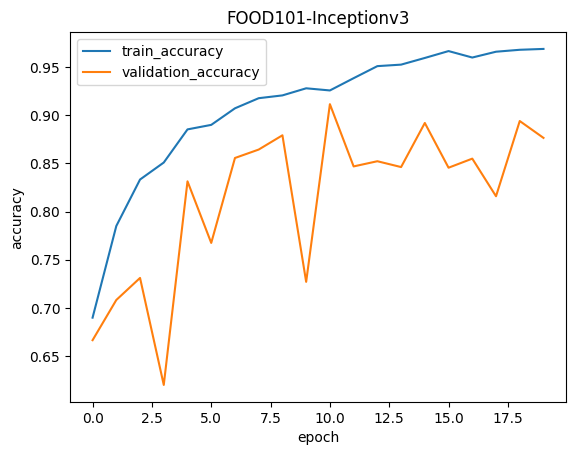

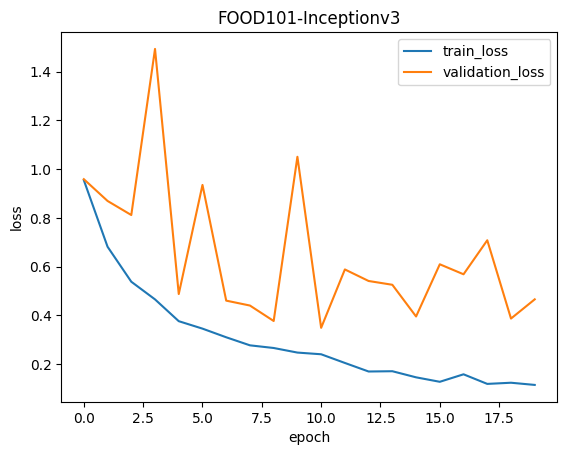

In [77]:
def plot_accuracy(history,title):
    plt.title(title)
    plt.plot(history.history['accuracy']) # change acc to accuracy if testing TF 2.0
    plt.plot(history.history['val_accuracy']) # change val_accuracy if testing TF 2.0
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train_accuracy', 'validation_accuracy'], loc='best')
    plt.show()


def plot_loss(history,title):
    plt.title(title)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train_loss', 'validation_loss'], loc='best')
    plt.show()


plot_accuracy(history,'FOOD101-Inceptionv3')
plot_loss(history,'FOOD101-Inceptionv3')

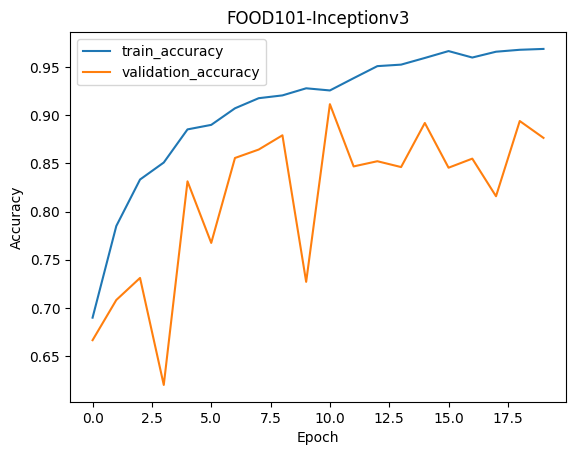

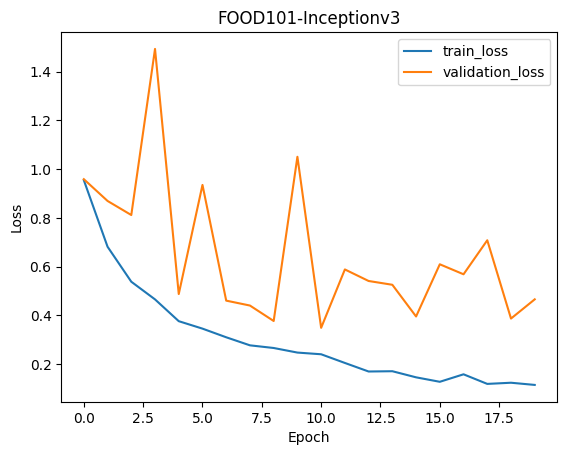

In [78]:
import matplotlib.pyplot as plt

# Assuming you have already trained your model and have a 'history' object.

def plot_accuracy(history, title):
    plt.title(title)
    plt.plot(history.history['accuracy'], label='train_accuracy')
    plt.plot(history.history['val_accuracy'], label='validation_accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend()
    plt.show()

def plot_loss(history, title):
    plt.title(title)
    plt.plot(history.history['loss'], label='train_loss')
    plt.plot(history.history['val_loss'], label='validation_loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.show()

# Example usage
# Replace 'history' and 'FOOD101-Inceptionv3' with your actual history object and title.
plot_accuracy(history, 'FOOD101-Inceptionv3')
plot_loss(history, 'FOOD101-Inceptionv3')


* The plots show that the accuracy of the model increased with epochs and the loss has decreased
* Validation accuracy has been on the higher side than training accuracy for many epochs
* This could be for several reasons:
  * We used a pretrained model trained on ImageNet which contains data from a variety of classes
  * Using dropout can lead to a higher validation accuracy
* The best model saved has a Top-1 validation accuracy of 93%



# Predicting classes for new images from internet using the best trained model

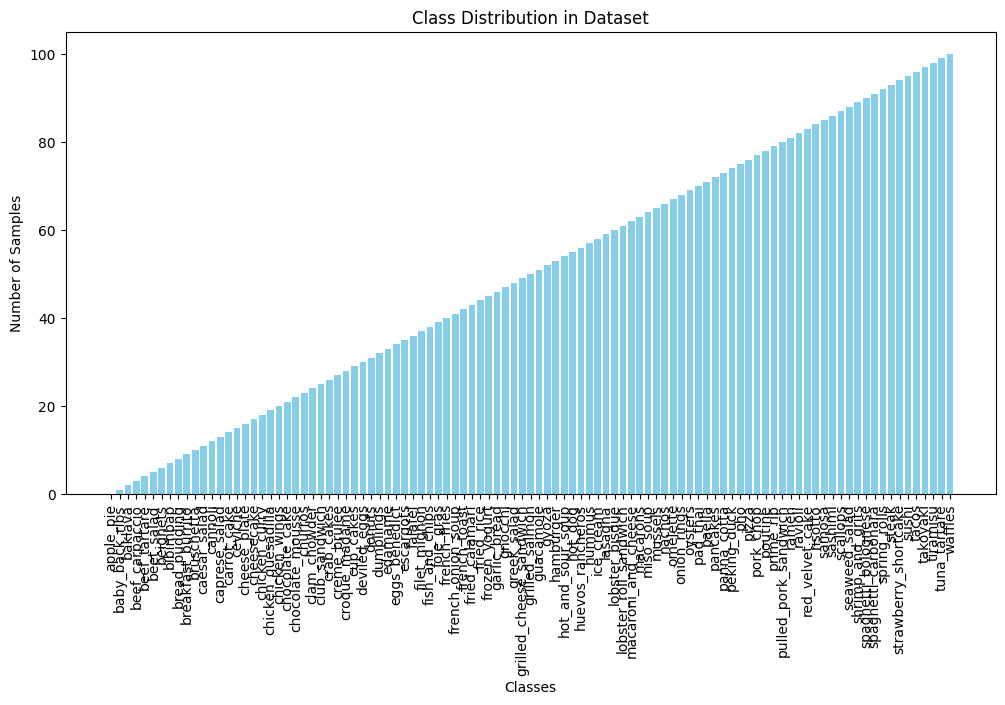

In [80]:
import matplotlib.pyplot as plt

# List of class labels (modify as per your dataset)
class_labels =['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito',
 'bruschetta',
 'caesar_salad',
 'cannoli',
 'caprese_salad',
 'carrot_cake',
 'ceviche',
 'cheese_plate',
 'cheesecake',
 'chicken_curry',
 'chicken_quesadilla',
 'chicken_wings',
 'chocolate_cake',
 'chocolate_mousse',
 'churros',
 'clam_chowder',
 'club_sandwich',
 'crab_cakes',
 'creme_brulee',
 'croque_madame',
 'cup_cakes',
 'deviled_eggs',
 'donuts',
 'dumplings',
 'edamame',
 'eggs_benedict',
 'escargots',
 'falafel',
 'filet_mignon',
 'fish_and_chips',
 'foie_gras',
 'french_fries',
 'french_onion_soup',
 'french_toast',
 'fried_calamari',
 'fried_rice',
 'frozen_yogurt',
 'garlic_bread',
 'gnocchi',
 'greek_salad',
 'grilled_cheese_sandwich',
 'grilled_salmon',
 'guacamole',
 'gyoza',
 'hamburger',
 'hot_and_sour_soup',
 'hot_dog',
 'huevos_rancheros',
 'hummus',
 'ice_cream',
 'lasagna',
 'lobster_bisque',
 'lobster_roll_sandwich',
 'macaroni_and_cheese',
 'macarons',
 'miso_soup',
 'mussels',
 'nachos',
 'omelette',
 'onion_rings',
 'oysters',
 'pad_thai',
 'paella',
 'pancakes',
 'panna_cotta',
 'peking_duck',
 'pho',
 'pizza',
 'pork_chop',
 'poutine',
 'prime_rib',
 'pulled_pork_sandwich',
 'ramen',
 'ravioli',
 'red_velvet_cake',
 'risotto',
 'samosa',
 'sashimi',
 'scallops',
 'seaweed_salad',
 'shrimp_and_grits',
 'spaghetti_bolognese',
 'spaghetti_carbonara',
 'spring_rolls',
 'steak',
 'strawberry_shortcake',
 'sushi',
 'tacos',
 'takoyaki',
 'tiramisu',
 'tuna_tartare',
 'waffles']

# Create a bar graph
plt.figure(figsize=(12, 6))
plt.bar(class_labels, range(len(class_labels)), color='skyblue')
plt.xlabel('Classes')
plt.ylabel('Number of Samples')
plt.title('Class Distribution in Dataset')
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.show()


* **Setting compile=False and clearing the session leads to faster loading of the saved model**
* **Withouth the above addiitons, model loading was taking more than a minute!**

In [38]:
!

The model got them all right!

# Fine tune Inceptionv3 model with 11 classes of data

* We trained a model on 3 classes and tested it using new data
* The model was able to predict the classes of all three test images correctly
* Will it be able to perform at the same level of accuracy for more classes?
* FOOD-101 dataset has 101 classes of data
* Even with fine tuning using a pre-trained model, each epoch was taking more than an hour when all 101 classes of data is used(tried this on both Colab and on a Deep Learning VM instance with P100 GPU on GCP)
* But to check how the model performs when more classes are included, I'm using the same model to fine tune and train on 11 randomly chosen classes


* The plots show that the accuracy of the model increased with epochs and the loss has decreased
* Validation accuracy has been on the higher side than training accuracy for many epochs
* This could be for several reasons:
  * We used a pretrained model trained on ImageNet which contains data from a variety of classes
  * Using dropout can lead to a higher validation accuracy
* I set number of epochs to just 10, as each epoch's taking around 6mins
* loss is still decreasing, so the model can be trained for some more epochs
* Increase the number of epochs for better accuracy



* The model did well even when the number of classes are increased to 11
* Model training on all 101 classes takes some time
* It was taking more than an hour for one epoch when the full dataset is used for fine tuning

# Summary of the things I tried
* This notebook is the refactored and organised version of all the experiments and training trials I made
* I used this very useful Keras blog - https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html for reference
* I spent considerable amount of time in fixing things even before getting to the model training phase
* For example, it took some time to get the image visualization plots aligned withouth any overlap
* It is easier to go through a notebook and understand code someone else has taken hours to finish
* I started with VGG16 pretrained model. It did give good validation accuracy after training for few epochs
* I then tried Inceptionv3. VGG was taking more time for each epoch and since inception was also giving good validation accuracy, I chose Inception over VGG
* For data augmentation, I sticked to the transformations used in the above blog
* I didnt use TTA except rescaling test images
* To avoid Colab connection issues during training, I set number of epochs to 10


# Further Improvements
* Try more augmentation on test images
* Fine tune the model on the entire dataset(for a few epochs atleast)
* Play with hyper parameters, their values and see how it impacts model performance
* There is currently no implementation to handle out of distribution / no class scenario. Can try below methods:
    * Set a threshold for the class with highest score. When model gives prediction score below the threshold for its top prediction, the prediction can be classified as NO-CLASS / UNSEEN
    * Add a new class called **NO-CLASS**, provide data from different classes other than those in the original dataset. This way the model also learns how to classify totally unseen/unrelated data
    * I am yet to try these methods and not sure about the results
* Recently published paper - [Rethinking ImageNet Pretraining](https://arxiv.org/abs/1811.08883 ), claims that training from random initialization instead of using pretrained weights is not only robust but also gives comparable results
* Pre-trained models are surely helpful. They save a lot of time and computation. Yet, that shouldn't be the reason to not try to train a model from scratch


# References
* Deep Learning with Python by Francois Cholett - must read really!
* [Building Powerful Image Classification Models](https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html)
* [How Convolutional Neural Networks See the World](https://blog.keras.io/how-convolutional-neural-networks-see-the-world.html)
* [The Building Blocks of Interpretability](https://distill.pub/2018/building-blocks/)
* [Feature Visualization](https://distill.pub/2017/feature-visualization/)